<h1>Objective</h1>
<h3>Track the spread of COVID-19 across different conutries</h3>

In [47]:
import pandas as pd
import requests
import json
import numpy as np
from datetime import datetime


<h2>Data Refinement </h2>

<h4> Understanding the data structure</h4>

In [48]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [49]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965


In [50]:
time_idx = pd_raw.columns[4:]


In [51]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()


,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [52]:
len(pd_raw['Country/Region'].unique())

188

In [53]:

pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [54]:
country_list=['India',
              'Indonesia',
              'Malaysia',
              'Germany',
              'Korea, South',
              'Brazil'
             ] 



In [55]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [56]:
df_plot

,date,India,Indonesia,Malaysia,Germany,"Korea, South",Brazil
0,1/22/20,0,0,0,0,1,0
1,1/23/20,0,0,0,0,1,0
2,1/24/20,0,0,0,0,2,0
3,1/25/20,0,0,3,0,2,0
4,1/26/20,0,0,4,0,3,0
...,...,...,...,...,...,...,...
224,9/2/20,3853406,180646,9360,247411,20644,3997865
225,9/3/20,3936747,184268,9374,248840,20842,4041638
226,9/4/20,4023179,187537,9385,250283,21010,4091801
227,9/5/20,4113811,190665,9391,251058,21177,4123000


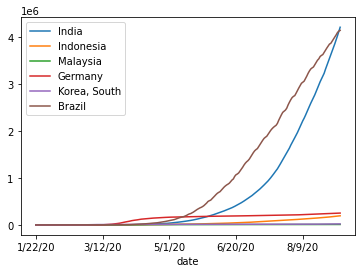

In [57]:
%matplotlib inline
df_plot.set_index('date').plot()

In [58]:
df_plot.head()

,date,India,Indonesia,Malaysia,Germany,"Korea, South",Brazil
0,1/22/20,0,0,0,0,1,0
1,1/23/20,0,0,0,0,1,0
2,1/24/20,0,0,0,0,2,0
3,1/25/20,0,0,3,0,2,0
4,1/26/20,0,0,4,0,3,0


In [59]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [60]:
time_idx = [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]

In [61]:
time_idx[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [62]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [63]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [64]:
df_plot.head()


,date,India,Indonesia,Malaysia,Germany,"Korea, South",Brazil
0,2020-01-22,0,0,0,0,1,0
1,2020-01-23,0,0,0,0,1,0
2,2020-01-24,0,0,0,0,2,0
3,2020-01-25,0,0,3,0,2,0
4,2020-01-26,0,0,4,0,3,0


In [65]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

In [66]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965


In [67]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no') 
pd_data_base

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
0,no,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398
1,no,Albania,41.153300,20.168300,0,0,0,0,0,0,...,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255
2,no,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364
3,no,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215
4,no,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,no,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,21251,21668,22204,22729,23281,23875,24471,25142,25575,26127
262,no,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,no,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1943,1946,1953,1958,1962,1976,1979,1983,1983,1987
264,no,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,11779,11902,12025,12097,12381,12415,12523,12639,12709,12776


In [68]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398
1,no,Albania,0,0,0,0,0,0,0,0,...,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255
2,no,Algeria,0,0,0,0,0,0,0,0,...,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364
3,no,Andorra,0,0,0,0,0,0,0,0,...,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215
4,no,Angola,0,0,0,0,0,0,0,0,...,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965


In [69]:
test_pd = pd_data_base.set_index(['state','country']).T
test_pd

state            no                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
...             ...     ...     ...     ...    ...                 ...   
9/2/20        38243    9728   45158    1199   2777                  94   
9/3/20        38288    9844   45469    1199   2805                  95   
9/4/20        38304    9967   45773    1215   2876                  95   
9/5/20        38324   10102   46071    1215   2935                  95   
9/6/20        38398   10255   46364    1215   2965                  95   

state                     Australian Capital Territory New South Wales  ...  \
country Argentina Armenia                    Australia       Australia  ...   
1/22/20         0       0                            0               0  ...   
1/23/20         0       0                            0               0  ...   
1/24/20         0       0                            0               0  ...   
1/25/20         0       0                            0               0  ...   
1/26/20         0       0                            0               3  ...   
...           ...     ...                          ...             ...  ...   
9/2/20     439172   44075                          113            4091  ...   
9/3/20     451198   44271                          113            4099  ...   
9/4/20     461882   44461                          113            4104  ...   
9/5/20     471806   44649                          113            4114  ...   
9/6/20     478792   44783                          113            4118  ...   

state               no                                       \
country United Kingdom Uruguay Uzbekistan Venezuela Vietnam   
1/22/20              0       0          0         0       0   
1/23/20              0       0          0         0       2   
1/24/20              0       0          0         0       2   
1/25/20              0       0          0         0       2   
1/26/20              0       0          0         0       2   
...                ...     ...        ...       ...     ...   
9/2/20          338676    1626      42437     48883    1046   
9/3/20          340411    1636      42688     49877    1046   
9/4/20          342351    1653      42998     50973    1049   
9/5/20          344164    1669      43293     52165    1049   
9/6/20          347152    1679      43587     53289    1049   

state                                                            
country West Bank and Gaza Western Sahara Yemen Zambia Zimbabwe  
1/22/20                  0              0     0      0        0  
1/23/20                  0              0     0      0        0  
1/24/20                  0              0     0      0        0  
1/25/20                  0              0     0      0        0  
1/26/20                  0              0     0      0        0  
...                    ...            ...   ...    ...      ...  
9/2/20               23875             10  1976  12415     6638  
9/3/20               24471             10  1979  12523     6678  
9/4/20               25142             10  1983  12639     6837  
9/5/20               25575             10  1983  12709     6837  
9/6/20               26127             10  1987  12776     6837  

[229 rows x 266 columns]

In [70]:
test_pd = test_pd.stack(level=[0,1]).reset_index()
test_pd


,level_0,state,country,0
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0
...,...,...,...,...
60909,9/6/20,no,West Bank and Gaza,26127.0
60910,9/6/20,no,Western Sahara,10.0
60911,9/6/20,no,Yemen,1987.0
60912,9/6/20,no,Zambia,12776.0


In [77]:
test_pd = test_pd.rename(columns={'level_0':'date',0:'confirmed'})

In [78]:
pd_relational_model = test_pd
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [79]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')
pd_relational_model.dtypes


date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [80]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)
